In [231]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# modelado
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# seleccion
from sklearn.feature_selection import f_classif, SelectKBest

In [174]:
data = pd.read_csv('/Users/SamuelHollis/Desktop/4GeeksAcademy/17a clase-ML/logistic_regression/data/raw/data')

In [175]:
df = pd.DataFrame(data)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


| Column            | Description                                                                    | Type        |
|-------------------|--------------------------------------------------------------------------------|-------------|
| age               | Age of customer                                                                | numeric     |
| job               | Type of job                                                                    | categorical |
| marital           | Marital status                                                                 | categorical |
| education         | Level of education                                                             | categorical |
| default           | Do you currently have credit                                                   | categorical |
| housing           | Do you have a housing loan                                                     | categorical |
| loan              | Do you have a personal loan?                                                   | categorical |
| contact           | Type of contact communication                                                  | categorical |
| month             | Last month in which you have been contacted                                    | categorical |
| day_of_week       | Last day on which you have been contacted                                      | categorical |
| duration          | Duration of previous contact in seconds                                        | numeric     |
| campaign          | Number of contacts made during this campaign to the customer                   | numeric     |
| pdays             | Number of days that elapsed since the last campaign until the customer was contacted | numeric     |
| previous          | Number of contacts made during the previous campaign to the customer           | numeric     |
| poutcome          | Result of the previous marketing campaign                                      | categorical |
| emp.var.rate      | Employment variation rate. Quarterly indicator                                 | numeric     |
| cons.price.idx    | Consumer price index. Monthly indicator                                        | numeric     |
| cons.conf.idx     | Consumer confidence index. Monthly indicator                                   | numeric     |
| euribor3m         | EURIBOR 3-month rate. Daily indicator                                          | numeric     |
| nr.employed       | Number of employees. Quarterly indicator                                       | numeric     |
| y                 | TARGET. Whether the customer takes out a long-term deposit or not              | categorical |


In [176]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [177]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [178]:
df.duplicated().sum()

12

In [179]:
df = df.drop_duplicates()

In [180]:
df.duplicated().sum()

0

In [181]:
df.shape

(41176, 21)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [183]:
num_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [184]:
df_num = df[num_var]
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [185]:
cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [186]:
df_cat = df[cat_var]
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [187]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [188]:
df['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [192]:
df['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

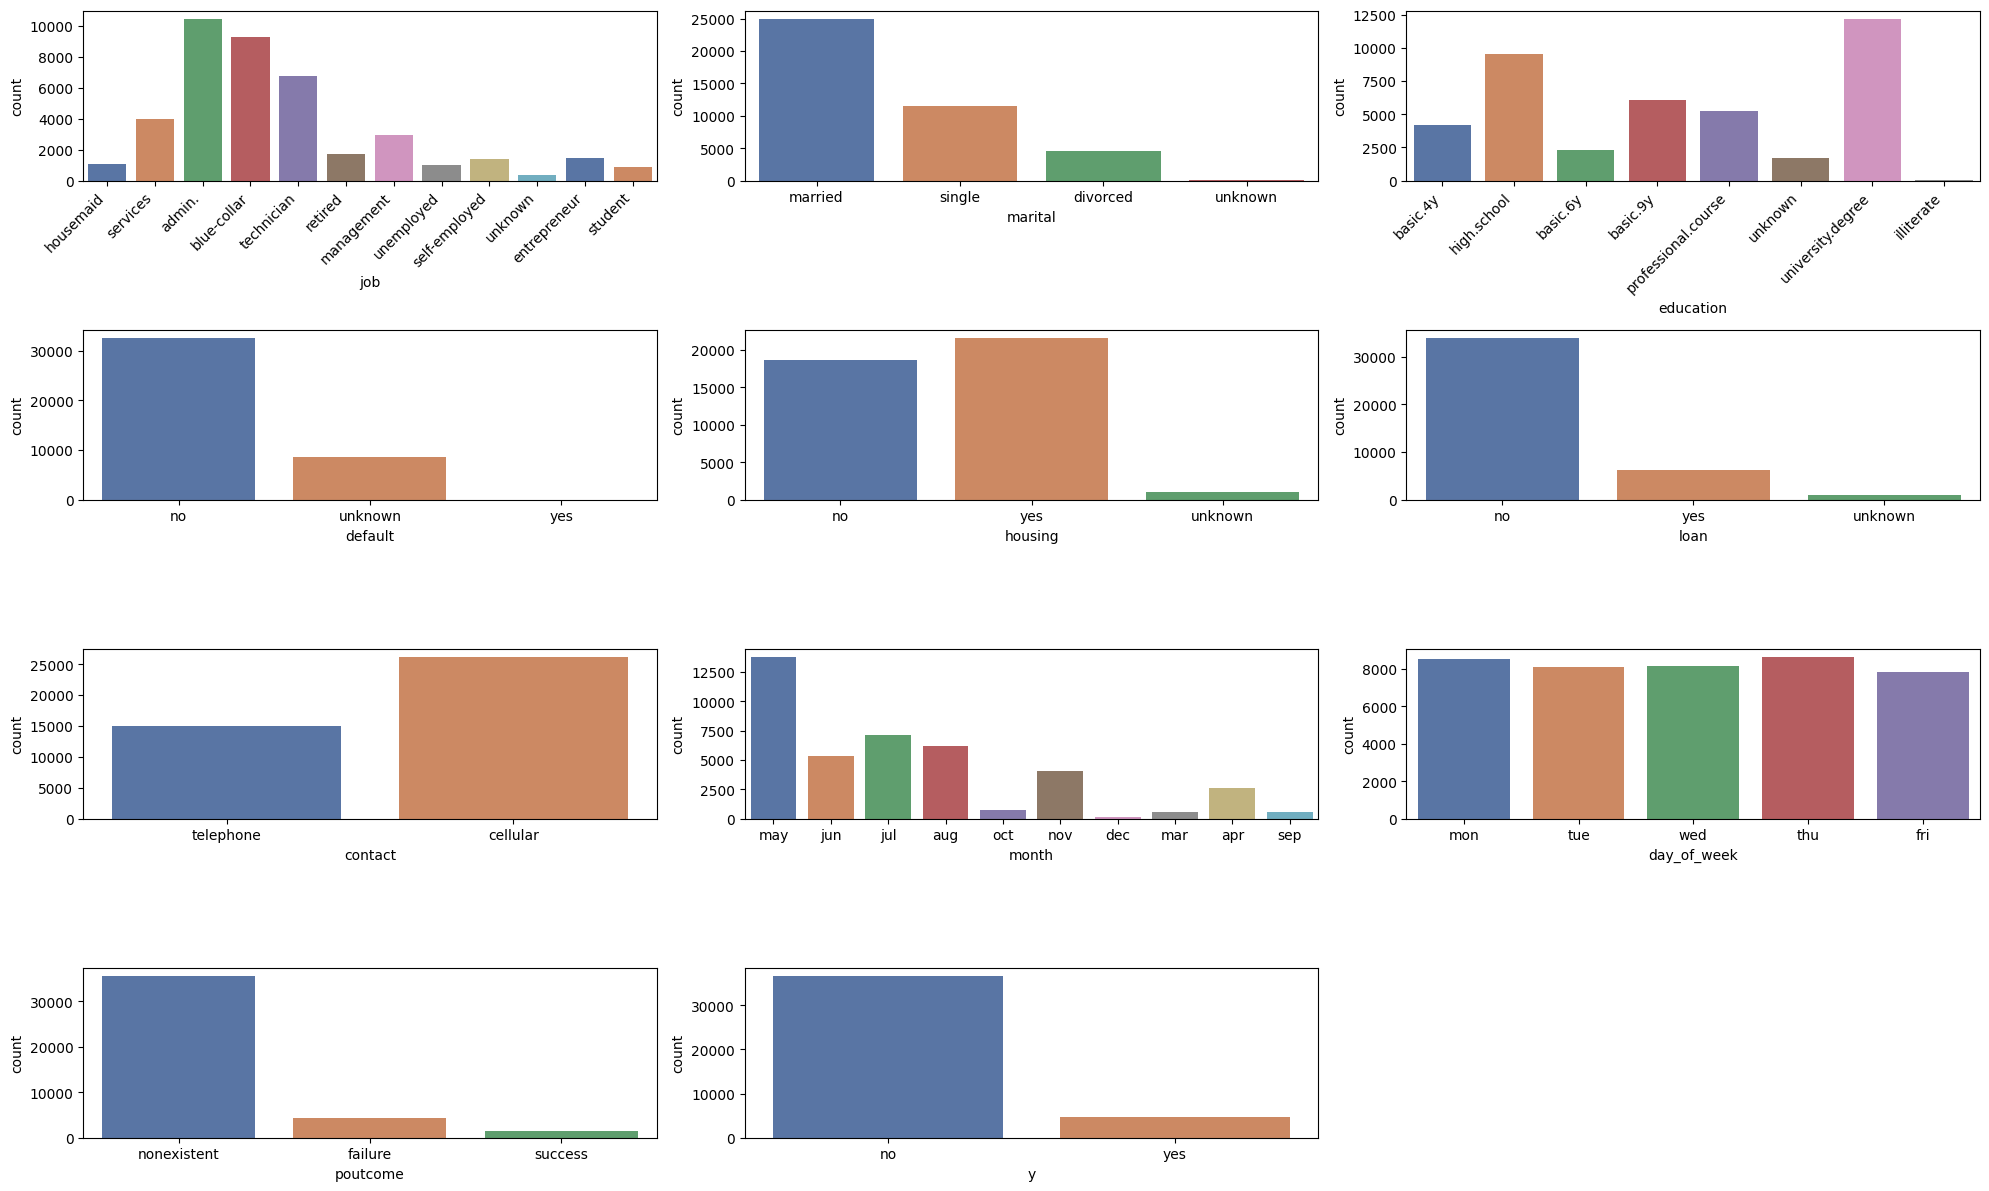

In [191]:
fig, axis = plt.subplots(4, 3, figsize= (20, 12))

sns.countplot(ax = axis[0,0], data = df, x = 'job', palette= 'deep', hue='job', legend=False)
sns.countplot(ax = axis[0,1], data = df, x = 'marital', palette= 'deep', hue='marital', legend=False)
sns.countplot(ax = axis[0,2], data = df, x = 'education', palette= 'deep', hue='education', legend=False)
sns.countplot(ax = axis[1,0], data = df, x = 'default', palette= 'deep', hue='default', legend=False)
sns.countplot(ax = axis[1,1], data = df, x = 'housing', palette= 'deep', hue='housing', legend=False)
sns.countplot(ax = axis[1,2], data = df, x = 'loan', palette= 'deep', hue='loan', legend=False)
sns.countplot(ax = axis[2,0], data = df, x = 'contact', palette= 'deep', hue='contact', legend=False)
sns.countplot(ax = axis[2,1], data = df, x = 'month', palette= 'deep', hue= 'month', legend=False)
sns.countplot(ax = axis[2,2], data = df, x = 'day_of_week', palette= 'deep', hue= 'day_of_week', legend=False)
sns.countplot(ax = axis[3,0], data = df, x = 'poutcome', palette= 'deep', hue= 'poutcome', legend=False)
sns.countplot(ax = axis[3,1], data = df, x = 'y', palette= 'deep', hue= 'y', legend=False)
fig.delaxes(axis[3,2])
plt.setp(axis[0, 0].get_xticklabels(), rotation=45, ha='right')
plt.setp(axis[0, 2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

- ***job***: hay tres trabajos que sobresalen con diferencia por encima del resto (admin., blue-collar, technician, en este orden)
- ***marital***: casi 25000 registros estan casados, menos de la mitad estan solteros y un pequeña parte (<5000) están divorciados.
- ***default***: solo hay información sobre la gente que no ha contratado un crédito, el resto son 'unknow' y no hay registros sobre si alguien si lo ha contratado.
- ***housing***: hay valores parecidos sobre los que han contratado credito de vivienda y los que no. hay una muy pequeña parte de valores 'unknow'.
- ***loan***: unos 35.000 registros de que No se ha contratado credito personal y unos 5000 de que si. Tmabién una infima parte de valores 'unknown'
- ***contact***: una gran mayoria tienen como contacto celular pero tambien hay una buena cantidad que tienen telefono.
- ***month***: en general se ven valores decrecientes segun avanzan los meses. siendo mayo el mes con mas contactos y no siendo el mas bajo pero con muy pocos contactos, setiembre (el ultimo més).
- ***day_of_week***: se ven valores muy similares cada dia de la semana,m cabe destacar que, aunque por poco, lunes y jueves son los días con mas ultimos contactos.
- ***poutcome*** un 85-90% de los valores son noexistent, un 8-10% son failure y un 4-6%, contactos satisfactorios.
- ***Y***: valor de personas que han contratado un depósito a largo plazo (unas 5.000) es muy inferior que los que no (casi 40.000). VARIABLE QUE QUEREMOS PREDECIR.

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Ploteamos todo buscando outliers

In [193]:
columnas = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
            "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", 
            "euribor3m", "nr.employed", "y"]

In [195]:
# Calcular el número de filas y columnas necesarias para el grid de subplots
n = len(columnas)
filas = (n // 3) + (1 if n % 3 != 0 else 0)
columnas_grid = 3

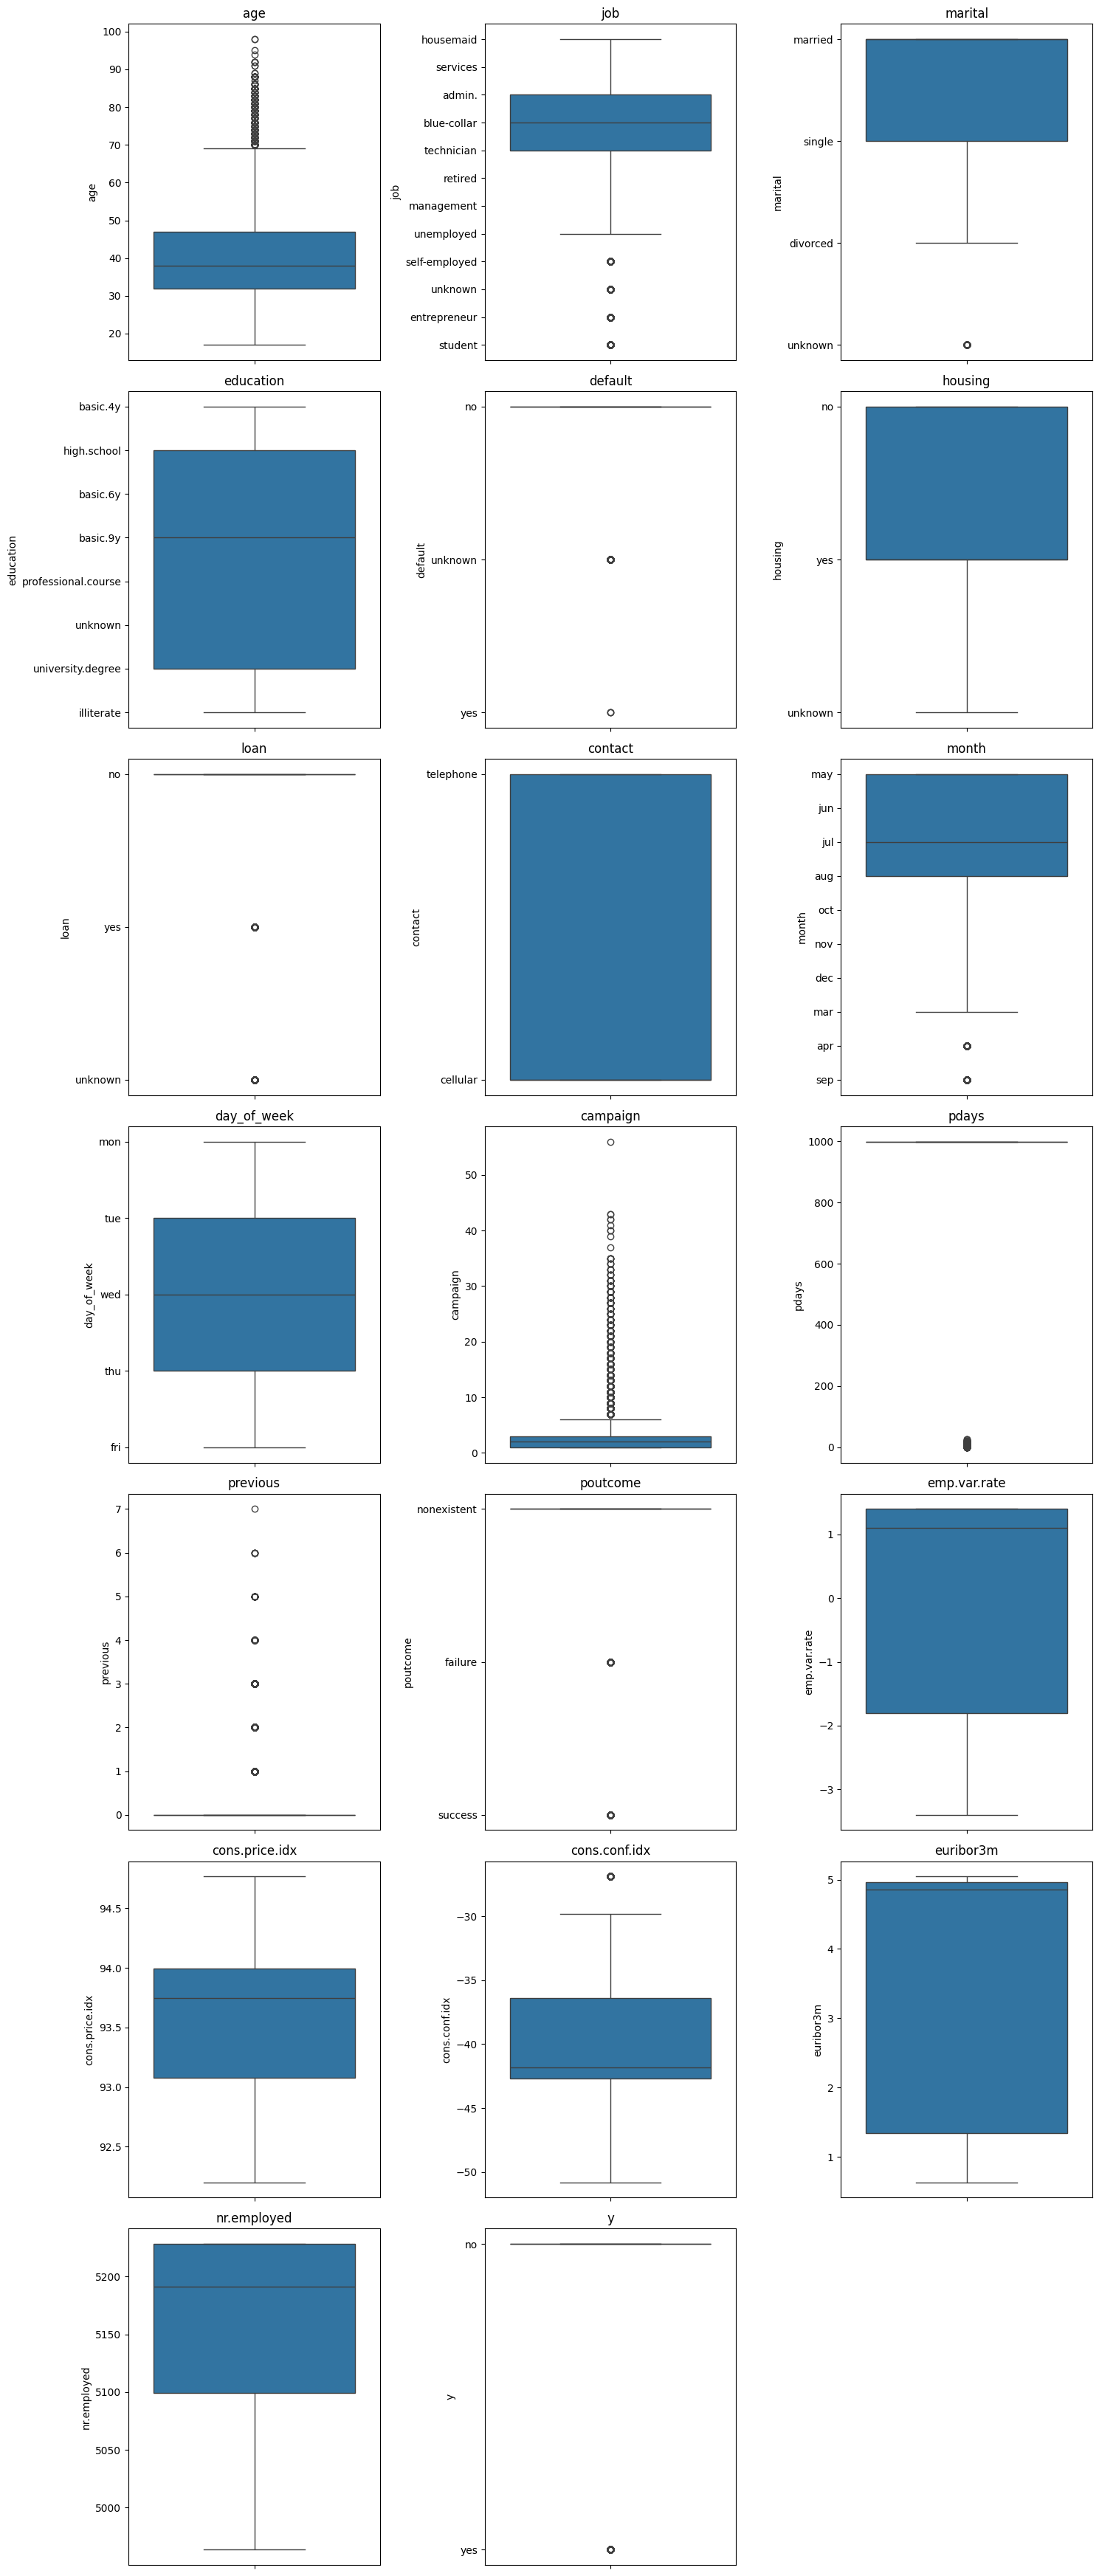

In [196]:
fig, axis = plt.subplots(filas, columnas_grid, figsize=(15, 5*filas))

# Aplanar el array de ejes para facilitar la indexación
axis = axis.flatten()

# Crear los boxplots
for i, col in enumerate(columnas):
    sns.boxplot(ax=axis[i], data=df, y=col)
    axis[i].set_title(col)

# Eliminar los ejes no utilizados si es necesario
for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

no veo valores outlier que sean preocupantes

## separamos train y test

In [218]:
X = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,29,entrepreneur,married,basic.6y,no,yes,yes,telephone,jul,fri,286,3,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1
8565,50,admin.,single,university.degree,no,no,no,telephone,jun,wed,178,6,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1
21424,29,admin.,single,university.degree,no,no,no,cellular,aug,tue,103,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1
3316,35,admin.,single,university.degree,no,no,no,telephone,may,thu,135,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
33246,40,blue-collar,single,high.school,unknown,no,no,cellular,may,tue,418,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1


### Escalado

In [219]:
# instancio el escalador
scaler = MinMaxScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_var])

# aplico el escalador en ambos
X_train_num_scal = scaler.transform(X_train[num_var])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_var)

X_test_num_scal = scaler.transform(X_test[num_var])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_var)

X_train_num_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,0.148148,0.058154,0.036364,1.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000
8565,0.407407,0.036194,0.090909,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000
21424,0.148148,0.020943,0.054545,1.0,0.0,1.000000,0.484412,0.615063,0.981410,1.000000
3316,0.222222,0.027450,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735
33246,0.283951,0.084994,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287


In [220]:
X_test_num_scal.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36264,0.518519,0.296869,0.000000,1.0,0.000000,0.104167,0.296960,0.418410,0.143278,0.425709
32672,0.209877,0.050427,0.000000,1.0,0.142857,0.333333,0.269680,0.192469,0.150759,0.512287
40872,0.185185,0.055917,0.018182,1.0,0.000000,0.479167,0.935308,0.054393,0.073679,0.000000
32907,0.444444,0.037820,0.018182,1.0,0.142857,0.333333,0.269680,0.192469,0.150759,0.512287
16464,0.086420,0.037414,0.000000,1.0,0.000000,1.000000,0.669135,0.338912,0.981410,1.000000


In [221]:
a = scaler.transform(X_train[num_var])
a

array([[0.14814815, 0.05815372, 0.03636364, ..., 0.33891213, 0.98050329,
        1.        ],
       [0.40740741, 0.03619357, 0.09090909, ..., 0.37656904, 0.95896622,
        1.        ],
       [0.14814815, 0.02094347, 0.05454545, ..., 0.61506276, 0.98141011,
        1.        ],
       ...,
       [0.66666667, 0.05083367, 0.01818182, ..., 1.        , 0.02720472,
        0.20378072],
       [0.28395062, 0.05998373, 0.01818182, ..., 0.60251046, 0.95715257,
        0.85973535],
       [0.02469136, 0.01769012, 0.05454545, ..., 0.33891213, 0.98072999,
        1.        ]])

### Encoding

In [222]:
# quitamos la y de las cat_var
cat_var = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [223]:
# instancio al escalador
onehot_encoder = OneHotEncoder(sparse_output=False)

# entreno el encoder con los datos de entrenamiento
onehot_encoder.fit(X_train[cat_var])

# aplico el encoder en ambos
X_train_cat_ohe = onehot_encoder.transform(X_train[cat_var])
X_train_cat_ohe = pd.DataFrame(X_train_cat_ohe, index = X_train.index, columns = onehot_encoder.get_feature_names_out(cat_var))

X_test_cat_ohe = onehot_encoder.transform(X_test[cat_var])
X_test_cat_ohe = pd.DataFrame(X_test_cat_ohe, index = X_test.index, columns = onehot_encoder.get_feature_names_out(cat_var))

X_train_cat_ohe.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3316,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33246,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [224]:
X_train_final = pd.concat([X_train_num_scal, X_train_cat_ohe], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_cat_ohe], axis=1)

X_train_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
12348,0.148148,0.058154,0.036364,1.0,0.0,1.000000,0.669135,0.338912,0.980503,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8565,0.407407,0.036194,0.090909,1.0,0.0,1.000000,0.882307,0.376569,0.958966,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
21424,0.148148,0.020943,0.054545,1.0,0.0,1.000000,0.484412,0.615063,0.981410,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3316,0.222222,0.027450,0.000000,1.0,0.0,0.937500,0.698753,0.602510,0.958059,0.859735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
33246,0.283951,0.084994,0.000000,1.0,0.0,0.333333,0.269680,0.192469,0.148946,0.512287,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [230]:
model = LogisticRegression()
model.fit(X_train_final, y_train)

LogisticRegression()

In [228]:
y_pred = model.predict(X_test_final)
y_pred

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [232]:
accuracy_score(y_test, y_pred)

0.9052938319572608